In [26]:
!pip install numpy
!pip install scipy
!pip install matplotlib

In [27]:
from numpy import *
from matplotlib import pyplot as plt
from scipy import signal

In [28]:
tau = 50 # Время на всех

In [46]:
def plotBuild(K, T):
    t = arange(0.0, T, 0.1)
    sys = signal.lti(K[0], K[1])
    step = sys.step(T=t)[1]
    impulse = sys.impulse(T=t)[1]
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(t, step, color='red', linewidth=0.85)
    plt.axhline(1.0, color='black', linestyle='--', linewidth=0.7)
    plt.grid()
    plt.ylabel('Amplitude')
    plt.xlabel('Time, (sec)')
    plt.title('Step response')

    plt.subplot(2, 1, 2)
    plt.plot(t, impulse, color='red', linewidth=0.85)
    plt.axhline(0.0, color='black', linestyle='--', linewidth=0.7)
    plt.grid()
    plt.ylabel('Amplitude')
    plt.xlabel('Time, (sec)')
    plt.title('Impulse response')
    plt.tight_layout()
    plt.show()

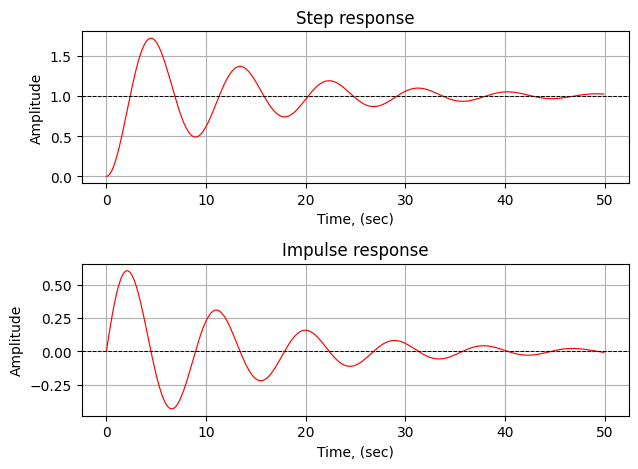

In [30]:
plotBuild(([1], [2, 0.3, 1]), tau) # Пример из методички

$$W(s) = \frac{K}{s}$$

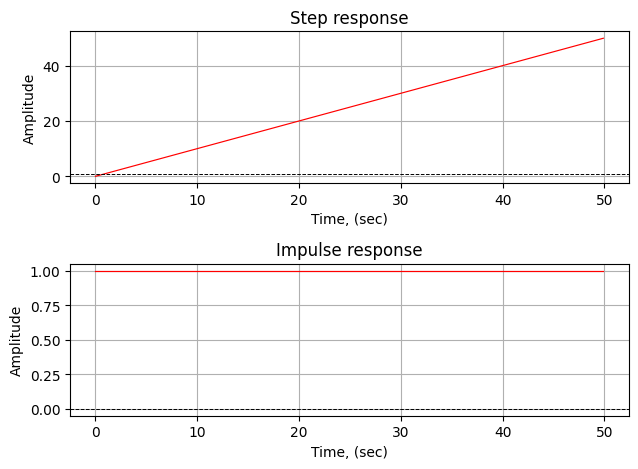

In [31]:
plotBuild(([1], [1, 0]), tau)

$$W(s) = Ks$$

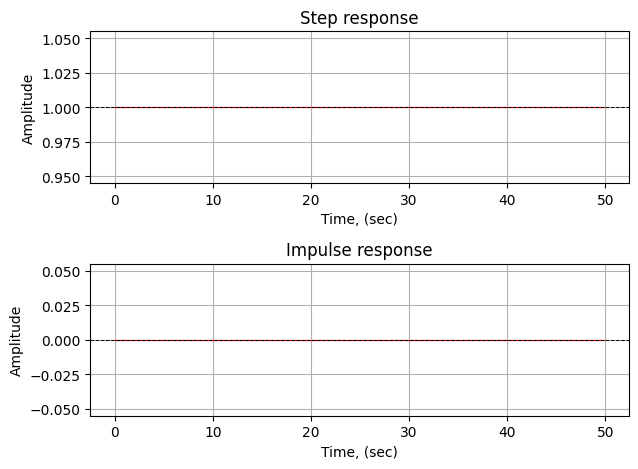

In [32]:
plotBuild(([1], [0, 1]), tau)

$$W(s) = K$$

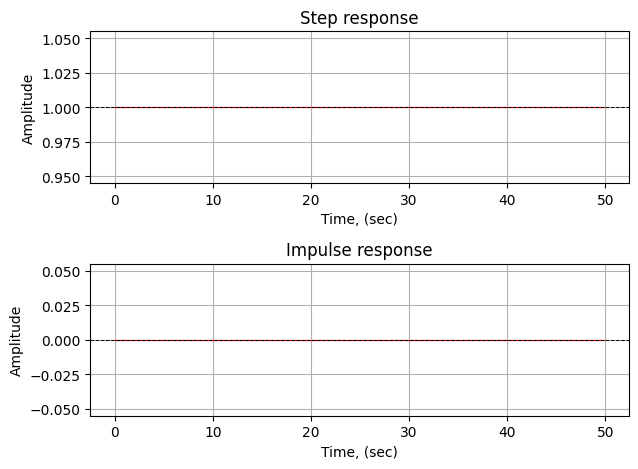

In [33]:
plotBuild(([1], [0, 1]), tau)

$$W(s) = \frac{K}{Ts+1}$$

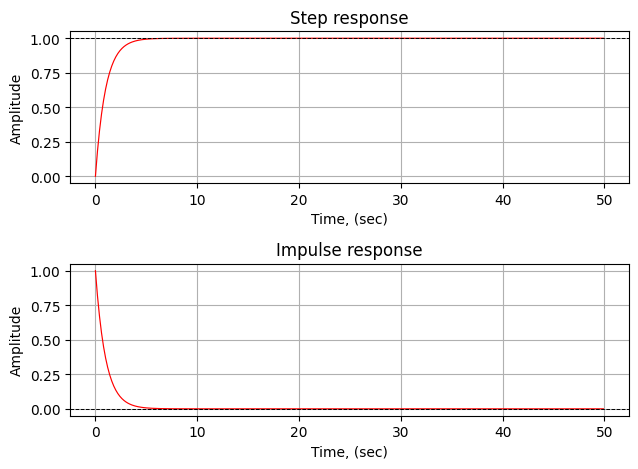

In [34]:
plotBuild(([1], [1, 1]), tau)

$$W(s) = \frac{K}{T_2^2 s^2 + T_1 s + 1}; T_1 >= 2T_2$$

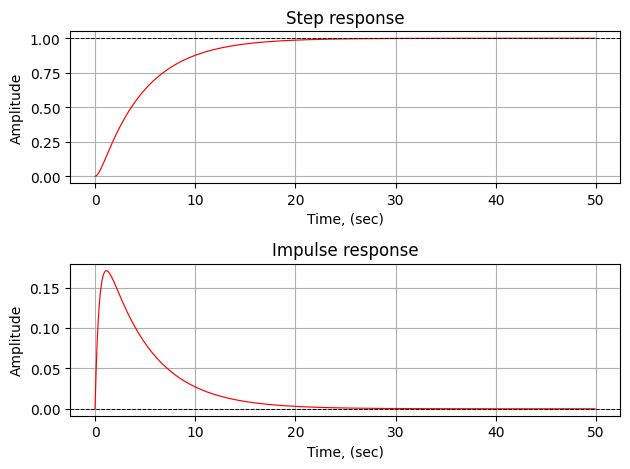

In [38]:
plotBuild(([1], [2, 5, 1]), tau)

$$W(s) = \frac{K}{T_2^2 s^2 + T_1 s + 1}; T_1 < 2T_2$$

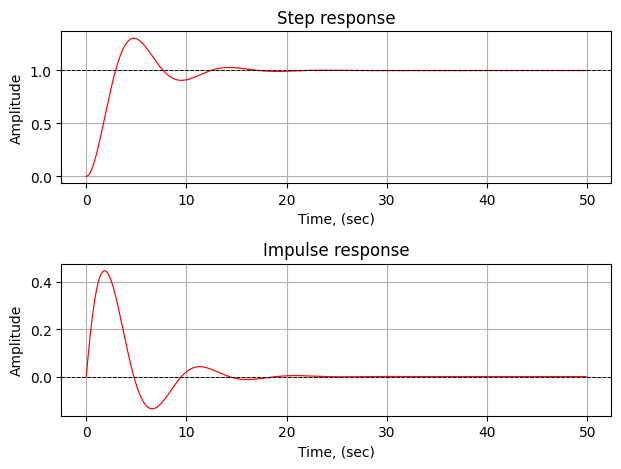

In [36]:
plotBuild(([1], [2, 1, 1]), tau)

$$W(s) = \frac{K}{T s^2 + 1}$$

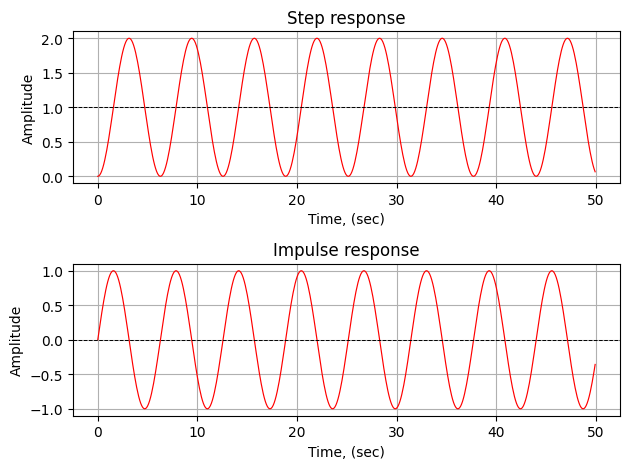

In [37]:
plotBuild(([1], [1, 0, 1]), tau)

$$W(s) = \frac{K}{s(T s + 1)}$$

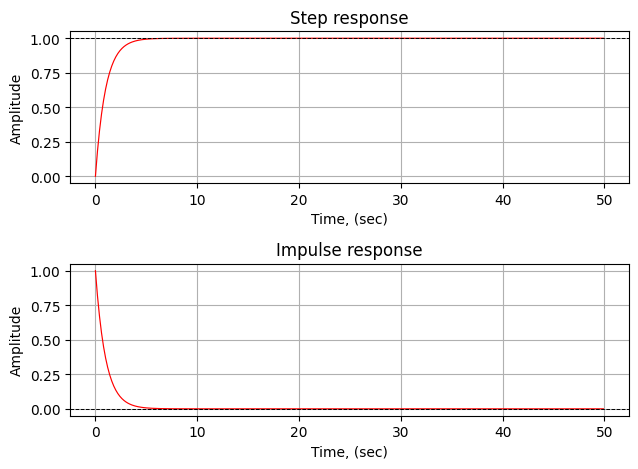

In [22]:
plotBuild(([1], [1, 1]), tau)

$$W(s) = \frac{Ks}{Ts + 1}$$

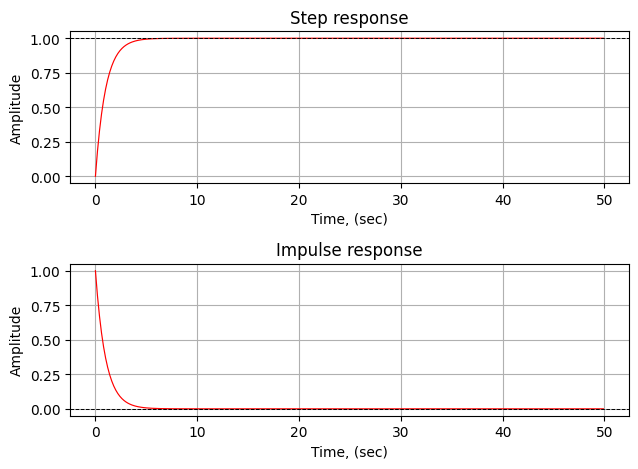

In [23]:
plotBuild(([1], [1, 1]), tau)

$$W(s) = K(Ts + 1)$$

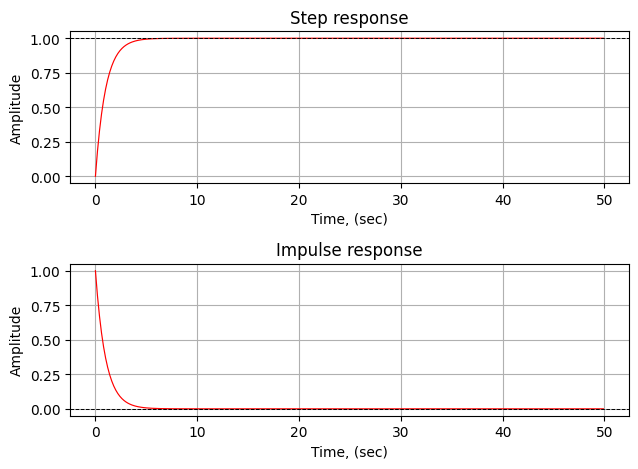

In [47]:
plotBuild(([0, 1], [1, 1]), tau)

$$W(s) = \frac{K(Ts + 1)}{s}$$

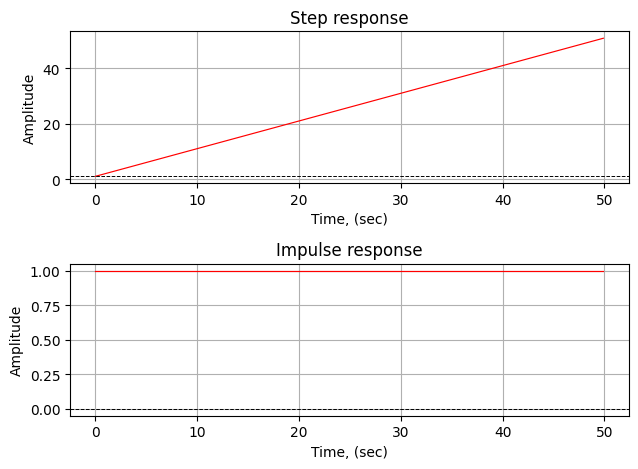

In [51]:
plotBuild(([1, 1], [1, 0]), tau)

# Вывод
Получены теоретические, типовые передаточные функции в Python, с использование бибилотеки SciPy. Есть расхождения с результатом функции tf из Matlab, вызванно неполным понимаем работы метода lti в библиотеке SciPi